Number of words:49


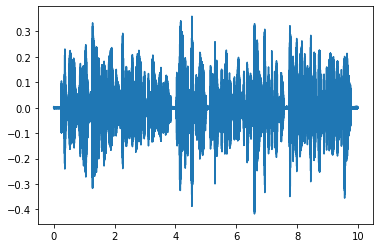

In [4]:
import soundfile
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
from CountWords import CountWords
from pathlib import Path

speechDict = CountWords("data/LibriSpeech/dev-clean/84/121123/84-121123.trans.txt")
print("Number of words:{}".format(speechDict[2]["count"]))

x, fs = soundfile.read("data/LibriSpeech/dev-clean/84/121123/84-121123-0002.flac")

t = np.linspace(0,10,num=len(x))

plt.plot(t,x)
plt.show()

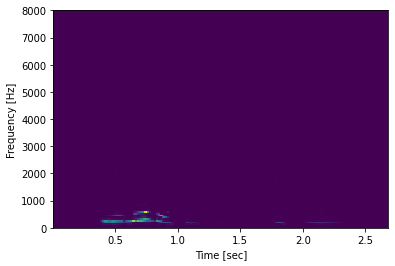

In [6]:
f, t, Sxx = signal.spectrogram(x, fs)

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

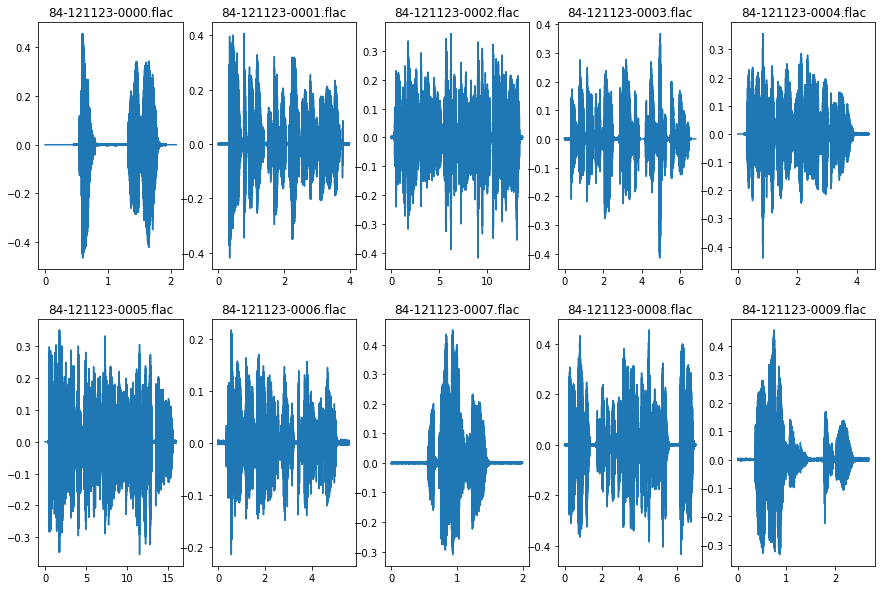

In [16]:
train = [[str(sig), soundfile.read(str(sig))[0]] for sig in sorted(Path().glob("data/LibriSpeech/dev-clean/84/121123/*.flac"))]
len(train)

plt.figure(figsize=(15, 10))
for i in range(0,10):
    x = train[i][1]
    plt.subplot(2,5,i+1)
    t = np.linspace(0,len(x)/16000,num=len(x))

    plt.plot(t,x)
    plt.title(Path(train[i][0]).name)

(array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 2., 2., 2., 1.,
        0., 1., 2., 1., 2., 1., 2., 1., 2., 1., 2., 2.]),
 array([0.05212772, 0.0556938 , 0.05925987, 0.06282594, 0.06639202,
        0.06995809, 0.07352417, 0.07709024, 0.08065631, 0.08422239,
        0.08778846, 0.09135454, 0.09492061, 0.09848669, 0.10205276,
        0.10561883, 0.10918491, 0.11275098, 0.11631706, 0.11988313,
        0.1234492 , 0.12701528, 0.13058135, 0.13414743, 0.1377135 ,
        0.14127957, 0.14484565, 0.14841172, 0.1519778 , 0.15554387]),
 <a list of 29 Patch objects>)

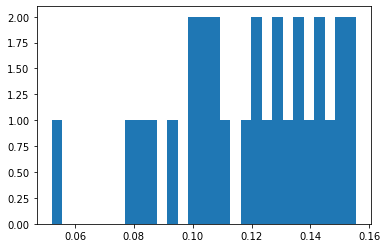

In [56]:
# get some features
import librosa
zero_cross = [np.average(librosa.feature.zero_crossing_rate(x[1])) for x in train]

plt.figure()
plt.hist(zero_cross, bins=29)

Text(0, 0.5, 'Count')

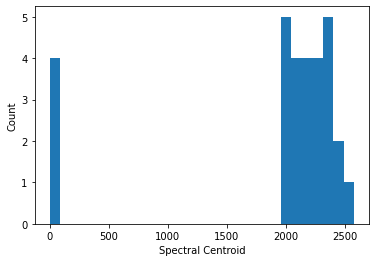

In [18]:
spectral_centroid = [librosa.feature.spectral_centroid(x[1])[0,0] for x in train]

plt.figure()
plt.hist(spectral_centroid, bins=29)
plt.xlabel('Spectral Centroid')
plt.ylabel('Count')

Text(0, 0.5, 'Count of words')

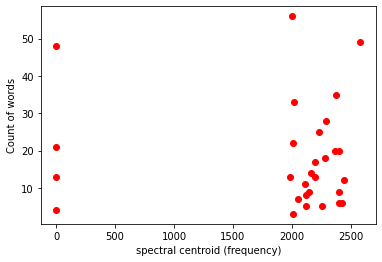

In [52]:
plt.figure()
data = []
for i in range(0,29):
    pair = [spectral_centroid[i],speechDict[i]["count"]]
    data.append(pair)
x = [item[0] for item in data]
y = [item[1] for item in data]
plt.plot(x,y,'ro')
plt.xlabel("spectral centroid (frequency)")
plt.ylabel("Count of words")

Text(0, 0.5, 'Count of words')

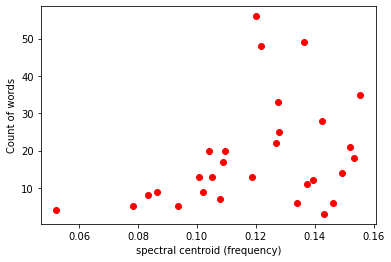

In [57]:
plt.figure()
plt.plot(zero_cross, y,'ro')
plt.xlabel("average zero-crossing rate")
plt.ylabel("Count of words")

In [55]:
print(zero_cross)

[0.0, 0.03125, 0.0576171875, 0.0224609375, 0.0, 0.0, 0.0380859375, 0.04345703125, 0.06396484375, 0.0322265625, 0.0556640625, 0.06494140625, 0.04296875, 0.02685546875, 0.04296875, 0.06103515625, 0.0380859375, 0.03515625, 0.04150390625, 0.06689453125, 0.0, 0.05029296875, 0.037109375, 0.0546875, 0.06591796875, 0.0361328125, 0.04052734375, 0.02880859375, 0.04345703125]
